A more general case to binary classification is multi-class classification. We'll look at both logistic regression and k-nearest neighbors to solve this kind of problem.<br>

The first strategy is known as one v.s. all. Essentially it is to fit multiple logistic regressions for each class v.s. all the rest combined, thus creating as binary classifiers for each class. Then for each data point, assign to it the predicted/estimated class which has the highest probability from the binary classifier. 

In [1]:
# standar import 
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
# load the iris dataset
iris = load_iris()

In [4]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
X=iris.data
Y=iris.target

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [12]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# load the data into pandas DataFrame
iris_data = DataFrame(X,columns = iris.feature_names)

In [15]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
iris_target = DataFrame(Y,columns = ['Species'])

In [19]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [31]:
# make a dictionary to label the species
dict_spec = {0:'Setosa',1:'Versicolor',2:'virginica'}

In [32]:
iris_target['Species_desc']=iris_target.Species.map(dict_spec)

In [33]:
iris_target.head(20)

,Species,Species_desc
0,0,Setosa
1,0,Setosa
2,0,Setosa
3,0,Setosa
4,0,Setosa
5,0,Setosa
6,0,Setosa
7,0,Setosa
8,0,Setosa
9,0,Setosa


In [34]:
iris = iris_data.join(iris_target)

In [28]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species_desc
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


### Data Visualization

First, an overview of the data using seaborn's pairplot

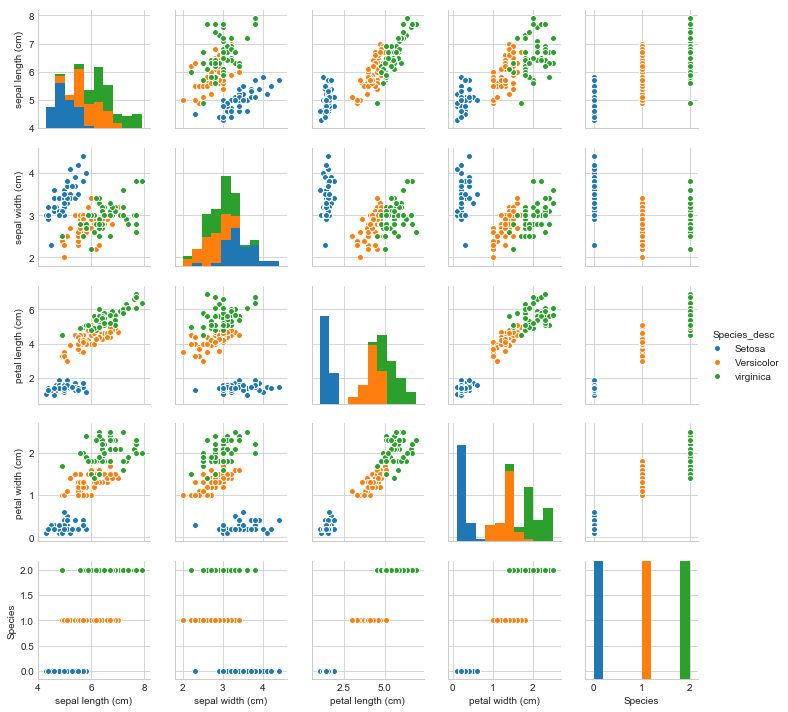

In [40]:
sns.pairplot(iris,hue='Species_desc',size = 2)

A quick look at the pairwise plot, Setosa is easily distinguishable from the other two species.<br>
We can also plot histograms of one of the 4 features by species.

In [39]:
iris.groupby('Species_desc').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
Species_desc,,,,,
Setosa,5.006,3.418,1.464,0.244,0
Versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


A group mean by species also shows petal length and petal width can be used to distinguish Setosa from the other two.

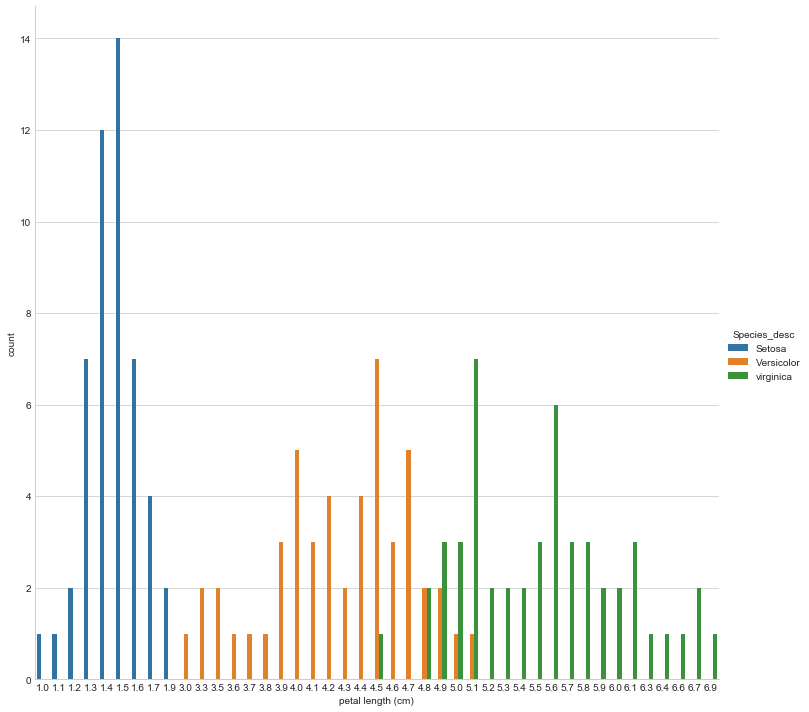

In [47]:
sns.factorplot('petal length (cm)', hue ='Species_desc',kind = 'count',size = 10, data = iris)

### Logistic Regression in Sci Kit Learn for Multi-class classification

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\Bingxin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In the mulit-class case, LogisticRegression uses one-vs-rest scheme if the 'multi-class' option is set to 'ovr', otherwise it uses the 'multinomial'

In [49]:
# Split the data into training and validation samples
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [50]:
# one-vs-rest logistic regression object
logit = LogisticRegression()

In [51]:
logit.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
logit.coef_

array([[ 0.36493905,  1.3676983 , -2.09840613, -0.94651868],
       [ 0.18034166, -1.18523858,  0.71353684, -1.32194751],
       [-1.42290813, -1.62515147,  2.18236998,  2.30007445]])

This should give the four estimated coefficients for 3 logistic regressions.

In [58]:
# accuracy rate for training dataset
logit.score(X_train,Y_train)

0.9732142857142857

In [59]:
# Prediction from the X_test
Y_pred= logit.predict(X_test)


In [61]:
Y_pred[:20]

array([0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0])

In [62]:
# prediction accuracy rate
from sklearn import metrics
metrics.accuracy_score(Y_test,Y_pred)

0.9473684210526315

### K nearest neighbor

The idea behind this can be found in: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

K-NN: to assign a class to a data point by checking the k (a pre-determined number) nearest data points, whose nearness is defined by a distance measure in features. Then pick the majority class among the k nearest points.

In [63]:
# import The sklearn.neighbors module 
# implements the k-nearest neighbors algorithm.
from sklearn.neighbors import KNeighborsClassifier

# import the kNeighbors classifier
knn = KNeighborsClassifier(n_neighbors=6)

In [64]:
# fit the data
knn.fit(X_train,Y_train)
Y_pred= knn.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred)

0.9473684210526315

In [68]:
# see different choices of k 
k = range(1,21)

# set an empty list
accuracy= []

# for loop and append the list 
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred= knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

In [69]:
accuracy

[0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.8947368421052632]

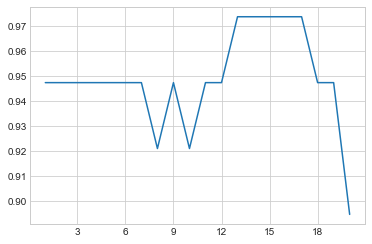

In [74]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(k,accuracy)